In [83]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [84]:
#funkcije

#fja koji pokusavamo da naucimo
def target(x,y):
    return x+y;


def Sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def Relu(x):
    return x if (x > 0) else 0

Relu = np.vectorize(Relu)

#izvod Relu
def dRelu(x):
    return 0 if x<0 else 1;

dRelu = np.vectorize(dRelu)

def Error(h,Y):
    return ((h-Y)**2)



def dError(E):
    return 2 * (E)

#init weights
def setUpW(L):
    W = []
    n = len(L)-1
    for i in range (0,n):
        if i == n-1:
            W.append(np.ones((L[i+1],L[i])))
        else:    
            W.append(0.1+0.1 * np.random.randn(L[i+1],L[i]))
        #W[i] -= np.mean(W[i])
    return W

# init bias
def setUpB(L):
    B = []
    n = len(L)-1
    for i in range (0,n):
        if i == n-1:
            B.append(np.zeros((L[i+1],1)))
        else:
            B.append(0.1+ 0.1 * np.random.randn(L[i+1],1))
        #B[i] -= np.mean(B[i]) 
    return B

# racuna aktivacije
def forward(X,Y,W,B,L):
    H = []
    A = []
    n = len(L)-1
    for i in range(0,n):
        if i == 0:
            A.append(copy.deepcopy(X))
            H.append(copy.deepcopy(X))
            a = W[i].dot(X)+ B[i]
            A.append(a)
            h = Relu(a)
            H.append(h)
        elif i == n-1:
            a = np.dot(W[i],h) + B[i]
            A.append(a)
            h = a
            H.append(h)            
        else:
            a = W[i].dot(h) + B[i]
            A.append(a)
            h = Relu(a)
            H.append(h)
    return (A,H)

# racuna gradijente
def backward(A,H,E,W,B,L,reg_param):
    
    d = dError(E)
    k = len(L)-1
    n = len(L)-1
    dB = []
    dW = []
    while k>0:
        #print (k)
        if k == len(L) -1:
            d = d * np.ones(H[k].shape)
        else:
            d= d * dRelu(H[k])
            
        
        dB.insert(0,d + reg_param * 2 * (H[n]) * np.sign(H[n])) 
        dW.insert(0,d*((H[k-1].T)) + reg_param * 2 * np.sign(H[n]) )
   
        d = W[k-1].T.dot(d)
        k = k-1
    return (dW,dB)
#forward pass, backward pass & update W
def iteracija(X,Y,W,B,L,ni,reg_param):
    (A,H) = forward(X,Y,W,B,L)
    h = H[len(L)-1][0,0]
    E = (h-Y)**2
    C = E + reg_param * (h**2)
    
    (dW,dB) = backward(A,H,E,W,B,L,reg_param)
   
    Wr = []
    Br = []
    k = len(W)
    for i in range(0, k):
        if i == k-1:
            Wr.append(W[i])
            Br.append(B[i])
        else:
            Wr.append( W[i] - ni * dW[i])
            Br.append( B[i] - ni * dB[i])
    return (A,H,E,Wr,Br,C)

#generis podatke za testiranje/trening razdvojeno zbog noramlizacije
def generate_train_data(size):
    X =  np.round((2*(np.random.randn(size,L[0],1)))+5,decimals=1)

    X -= np.mean(X,axis=0)
    X /= np.std(X, axis = 0)

    Y = target(X[:,0,0], X[:,1,0])
    
    return (X,Y)

def generate_test_data(size):
    
    X = np.round( (2*(np.random.randn(size,L[0],1)))+5 ,decimals=1 )
    Y = target(X[:,0,0], X[:,1,0])
    
    return (X,Y)
    

def train(X,Y,W,B,L,ni,reg_param):
    niz = []
    for i in range(0,len(X)):
        (A,H,E,W,B,C) = iteracija(X[i],Y[i],W,B,L,ni,reg_param)
        niz.append(C)
    return (niz,W,B)

def test(X,Y,W,B,L):
    niz = []
    for i in range(0,len(X)):
        (A,H) = forward(X[i],Y[i],W,B,L)
        niz.append( H[len(L)-1][0,0])
    plt.scatter(niz,Yt)
    plt.plot(np.arange(0,15), np.arange(0,15),color ="r")


In [85]:
#inicijalizacija

#oblik mreze (uvek 1 izlaz zbog regresije, 2 ulaza zbog sabiranja 2 broja)
L = [2,7,11,1]

W = setUpW(L)
B = setUpB(L)


In [86]:
#generisanje testova
test_size = 100
(Xt,Yt) = generate_test_data(test_size)

In [87]:
#na ovoj celiji izvrsiti Run All Below za generisanje trening skupa, testirnja i prikaz rezultat

#brzina ucenja i parametar za regularizaciju
ni = 0.00001
reg_param = 0.10

In [88]:
#init trening podataka
input_size = 300
(X,Y) = generate_train_data(input_size)

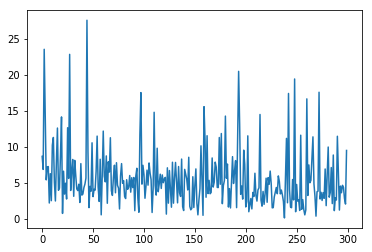

In [89]:
#treniranje, u nizu Loss
(niz,W,B) = train(X,Y,W,B,L,ni,reg_param)

# y osa cene, x osa iteracije
plt.plot(np.arange(input_size),np.array(niz))

In [90]:
#mini test sabiranja
(A,H) = forward(np.array([[6.],[9.1]]),Y,W,B,L)
H[len(L)-1][0,0]

13.772716711036535

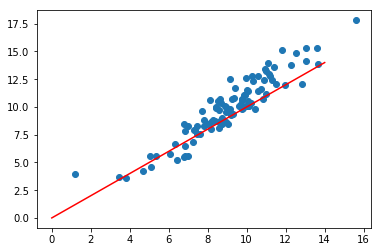

In [91]:
#crvena linija ocekivani rezultati, plave tacke dobijeni rezultati
test(Xt,Yt,W,B,L)